#### <font color='#8000ff'>Data Discriptions </font>



This data was collected between 2008 and 2010 using a mechanical GPS reader in the cab meter.  The data is reported by trip for the 19 000 trips.  It has starting point and ending point for each trip, the time of travel, the distance traveled and costs etc....

 # <font color='#8000ff'>Work flow </font>

# Feature Selection:Filter Method 
* Removing Constant, 
* Quasi-Constant 
* and Duplicate Features

# Feature Engineering
* a) Feature Extraction 
* b) Feature Creation
* c) Missing data imputation
* d) Categorical Variable Encoding

# Train a Linear Model and Prediction

# Feature Selection:Filter Method

* a) Univariate mse Method
* b) The correlation Method 
* c) Regression Coefficients


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import datetime
#from FSFuncions import filter_method , q_constant_feature_info, duplicated_features,lists_of_dtypes
#data.to_csv('TaxiRawData1.csv', index=False)

In [2]:

rawData = pd.read_csv('TaxiRawData.csv',infer_datetime_format=True, index_col=0)
rawData.columns = [col.lower() for col in rawData.columns]
rawData.head()

,shift_number,trip_number,passenger_count,fare_rate,tolls_amt,tip_amt,imp_surcharge,surcharge,total_amt,out_of_state,...,vendor_name,payment_method_rec,datetime_dropoff,datetime_pickup,mta_tax,improvement_surcharge,start_boro,tolls,zipcode_start,zipcode_end
medallion,,,,,,,,,,,,,,,,,,,,,
C9893T,3704580,1733,1,15,0.0,0.00,0.3,0.0,6.60,1,...,CMT,Cash,10/19/2008 0:12,10/19/2008 0:05,0.5,0.3,Manhatan,0.0,10019,10020
C8885T,4138834,9025,1,2,0.0,1.95,0.3,0.0,14.95,1,...,CMT,Credit,11/23/2008 0:44,11/23/2008 0:30,0.5,0.3,Manhatan,0.0,10282,10018
C5457T,273646894,15703,5,2,0.0,0.00,0.3,0.0,5.00,1,...,VTS,Cash,12/21/2008 0:39,12/21/2008 0:35,0.5,0.3,Manhatan,0.0,10167,10103
C7573T,4867214,4168,2,2,0.0,0.00,0.3,0.0,7.00,1,...,CMT,Cash,1/25/2009 0:59,1/25/2009 0:51,0.5,0.3,Manhatan,0.0,10154,10020
C8482T,274336989,21685,4,2,0.0,0.00,0.3,0.0,22.20,1,...,VTS,Cash,8/2/2009 0:55,8/2/2009 0:38,0.5,0.3,Manhatan,0.0,10034,10018


In [3]:
rawData.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18999 entries, C9893T to C0808T
Data columns (total 26 columns):
shift_number             18999 non-null int64
trip_number              18999 non-null object
passenger_count          18999 non-null int64
fare_rate                18999 non-null int64
tolls_amt                18999 non-null float64
tip_amt                  18999 non-null float64
imp_surcharge            18999 non-null float64
surcharge                18999 non-null float64
total_amt                18999 non-null float64
out_of_state             18999 non-null int64
trip_distance            18999 non-null float64
long_end                 18999 non-null float64
lat_end                  18999 non-null float64
long_start               18999 non-null float64
lat_start                18999 non-null float64
congestion_surgcharge    18999 non-null int64
vendor_name              18999 non-null object
payment_method_rec       18978 non-null object
datetime_dropoff         18999 non-null

In [4]:
# let's make a copy of this dataframe for futures comparison
data=rawData.copy()


<br> 
# <font color='#8000ff'>Feature Selection  </font>
# <font color='#ff0066'> 1)  Filter Method </font> 

##  a) Removing Constant,  Quasi-Constant, Duplicate Features 
> ###  To preform the first phase of feature selection I wrote 4 functions. 
> * #### <font color='#eb4799'> Function 1:</font>  Takes two arguments, a dataframe and a list of datatypes as strigs. It returns a list of features with the desired datatypes.

In [5]:
# here I write a reusible function that takes a dataframe and a list of wanted data types as arguments and 
# returns a list of features with the passed in data types.

def lists_of_dtypes(df, dtype_list):
    features=[]
    for dtype in dtype_list:
        features.append(list(df.select_dtypes([dtype]).columns))
    return sum(features, [])

print(lists_of_dtypes(data, ['float64', 'int64']), end= " ")


['tolls_amt', 'tip_amt', 'imp_surcharge', 'surcharge', 'total_amt', 'trip_distance', 'long_end', 'lat_end', 'long_start', 'lat_start', 'mta_tax', 'improvement_surcharge', 'tolls', 'shift_number', 'passenger_count', 'fare_rate', 'out_of_state', 'congestion_surgcharge', 'zipcode_start', 'zipcode_end'] 

> * #### <font color='#eb4799'> Function 2:</font>  This function takes two arguments: a dataframe and a VarianceThreshold. If threshold = 0 it returns constant features in the data frame. To find Quasi-constant features we specify the desired threshold value.

In [6]:
def filter_method(df, threshold): 
    #import the VarianceThreshold class from scit-learn
    from sklearn.feature_selection import VarianceThreshold
    #make an instance of the class
    constant_filter = VarianceThreshold(threshold= threshold)
    
    # here i am going to remove the constant features manually. 
    # in order to be able to remove object and numeric constant at the same time. 
    if threshold ==0:
        # the comprehension list returns columns that contain only 1 label:
        constant_features = [feat for feat in df.columns if len(df[feat].unique()) == 1]
        # this returns a dataframe of the constant features and a message if there are none
        if len(constant_features) !=0:
            return df[constant_features]
        else :
            return ['There are no constant features']
  
    # if the threshold !=0, i call an instance of the VarianceThreshold with the passed value.
    elif threshold !=0:    
        #call the lists_of_dtypes function to extract the numeric features
        numeric_features=lists_of_dtypes(df, ['float64', 'int64'])
        # fit the VarianceThreshold estimator  the numeric_features 
        constant_filter.fit(df[numeric_features])
        # finally we can print the constant features 
        # get_support is a boolean vector that indicates which features are retained
        # if we sum over get_support, we get the number of features that are not constant
        constant_features = [column for column in df[numeric_features].columns
                    if column not in df[numeric_features].columns[constant_filter.get_support()]]
        # this returns the quasi-constant features        
        if len(constant_features) !=0:
            return df[constant_features]
        else :
            return ['There are no Quasi-constant features']
        


> * #### <font color='#eb4799'> Function 3:</font>  This function takes a data frame as an agrument and returns a data frame with all the duplicated features



In [7]:

def duplicated_features(df):
    duplicated = []
    #looping Through every value in a culumn
    for i in range(0, len(df.columns)):
       #start from the first column in the data fram(column index 0)
        column1 = df.columns[i]
        # compare the first column with evry other column in the dataframe
        for column2 in df.columns[i + 1:]:

            # use the pandas method equals() to indentify the duplicated columns
            # the mothod returns a boolean: True if the columns are identical false otherwise
            if df[column1].equals(df[column2]):

                # it the column is identical we add it our duplicated list
                duplicated.append(column2)
                duplicated.append(column1)
    if len(duplicated) !=0:
        return df[duplicated]
    else :
        return ['There are no duplicated features']
        



> * #### <font color='#eb4799'> Function 4:</font>   This function takes 3 arguments: a dataframe, a list of features returned by the filter_method  and an integer. The integer placeholder to control the count of the most frequent values in a column. For exemple, if we want to see the 5 most frequent values in a column as well as their respective percentages, we set top=5.

In [8]:

def q_constant_feature_info(df,feature_list, top=5):
    
    if type(feature_list) != list:
        feature_list=feature_list.columns
    if len(feature_list[0])==30:
        print("There are no constant features")
    elif len(feature_list[0])==36:
        print("There are no quasi-constant features")
    elif len(feature_list[0])==32:
        print("There are no duplicated features")
    else:
        for col in df.columns:
                if col in  feature_list:
                    print("                               ",col," Feature                                          ")
                    print("The number of unique values in the [",col,"] feature is ",len(df[col].unique()))
                    print("The list of unique values in the [",col,"] feature is ", sorted(df[col].unique()[:top])) 
                    print("------------------------Count and Percentage of element ocurances-----------------------")

                    keys = df[col].unique()[:top]
                    values=[]
                    for item in keys: 
                        value = df[col].isin([item]).sum(axis=0)
                        values.append(value)
                        d=dict(zip(keys, values))
                    print('{:25.20}'.format("The value "), '{:32.20}'.format("Number of occurrences"),'{:4.30}'.format(" percentage of occurrences"))    
                    for key, value in sorted(d.items(), key=lambda item: item[1], reverse=True):
                        percent=(100 *  value)/len(df)
                        key=str(key)
                        value=str(value)
                        percent=str(percent)
                        print('{:25.20}'.format(key),'{:33.20}'.format(value), '{:4.6}'.format(percent),"%")

                    print("")  
                    print("----------------------------------------------------------------------------------------")



> ## a-1) Removing Constant Features
 <font color='#eb4799'> Constant Features </font> are those that show the same value, just one value, for all the observations of the dataset. This is, the same value for all the rows of the dataset. These features provide no information that allows a machine learning model to discriminate or predict a target.
>> #### i) Get the list of constant features 

In [9]:
# To find the constant features, I call the function, pass it my data and set the threshold to zero
constant=filter_method(data, 0)
constant.head()

,imp_surcharge,out_of_state,mta_tax,start_boro
medallion,,,,
C9893T,0.3,1,0.5,Manhatan
C8885T,0.3,1,0.5,Manhatan
C5457T,0.3,1,0.5,Manhatan
C7573T,0.3,1,0.5,Manhatan
C8482T,0.3,1,0.5,Manhatan


>> #### ii) Take take a look at the above constant features

In [10]:
# to find details about these constant features let me call the q_constant_feature_info
# ill pass it my dataframe, the list of constant features and set up top most frequent values top=5.
# setting top=5 the most ferquent values in a column as well as their counts and persentages 
q_constant_feature_info(data,filter_method(data, 0))


                                imp_surcharge  Feature                                          
The number of unique values in the [ imp_surcharge ] feature is  1
The list of unique values in the [ imp_surcharge ] feature is  [0.3]
------------------------Count and Percentage of element ocurances-----------------------
The value                 Number of occurrence              percentage of occurrences
0.3                       18999                             100.0 %

----------------------------------------------------------------------------------------
                                out_of_state  Feature                                          
The number of unique values in the [ out_of_state ] feature is  1
The list of unique values in the [ out_of_state ] feature is  [1]
------------------------Count and Percentage of element ocurances-----------------------
The value                 Number of occurrence              percentage of occurrences
1                         18999

>> #### iii) Remove constant constant features
As we can see all of the above features are constant


In [11]:
# I dont Think any of the above featues could be useful for predicting trip prices
# I am going to delete them all 
data.drop(constant,inplace=True, axis=1)

> ## a-2) Removing Quasi-Constant Features
 <font color='#eb4799'> Quasi-Constant </font> features are features that have the same value for the vast majority of the observations of the dataset. In general, these features provide little if any information that allows a machine learning model to  predict a target. But there can be exceptions attention is required when when removing these type of features.
>> #### i) Get the list of Quasi-Constant features 

In [12]:
# Again, i'am going to call my filter_method function and  set threshold =  0.01, 
# which means that if the variance of the values in a column is less than 0.01, remove that column. 
# In other words, remove feature column where approximately 99% of the values are similar.
quasi_const=filter_method(data, 0.01)
quasi_const.head()


,long_end,lat_end,long_start,lat_start,improvement_surcharge,fare_rate,congestion_surgcharge
medallion,,,,,,,
C9893T,-73.9871,40.7686,-73.9845,40.7587,0.3,15,0
C8885T,-74.0125,40.7171,-73.9904,40.7614,0.3,2,0
C5457T,-73.9745,40.7549,-73.9804,40.7627,0.3,2,0
C7573T,-73.9714,40.7569,-73.9848,40.7597,0.3,2,0
C8482T,-73.9355,40.8572,-73.9856,40.7629,0.3,2,0


>> #### ii) Take take a look at the above Quasi-constant features

In [13]:
#again,  to find details about these quasi-constant features i will call the q_constant_feature_info
# ill pass it my dataframe, the list of quasi-constant features and set up top most frequent values, top=5.
# setting top=5 the most ferquent values in a column as well as their counts and persentages 
q_constant_feature_info(data,filter_method(data, 0.01))

                                fare_rate  Feature                                          
The number of unique values in the [ fare_rate ] feature is  5
The list of unique values in the [ fare_rate ] feature is  [1, 2, 3, 4, 15]
------------------------Count and Percentage of element ocurances-----------------------
The value                 Number of occurrence              percentage of occurrences
2                         18987                             99.936 %
3                         6                                 0.0315 %
4                         3                                 0.0157 %
1                         2                                 0.0105 %
15                        1                                 0.0052 %

----------------------------------------------------------------------------------------
                                long_end  Feature                                          
The number of unique values in the [ long_end ] feature is  1409
T

>> #### iii) Remove constant constant features
As we see fare_rate and congestion_surgcharge features have the value 2 and 0 respectively for more than 99.9 % of the observation. which means that if the variance of the values in a column is less than 0.01, remove that column. I don't think they could be useful, so I'm going to remove them. however, the features long_start, lat_start, long_end, lat_end, are latitude and longitude of cabs' pick up and drop off locations, I don't think they are useful for the prediction,  but ill keep them for the feature engineering section. To keep them, I am going to pass them as a list to the features_to_keep list argument.

In [14]:
# remove the irelevent quasi-constant  features

data.drop(['fare_rate','congestion_surgcharge','improvement_surcharge'],inplace=True, axis=1)

print("The number of features the original dataFrame : ",len(rawData.columns))
print("The number of features the new dataFrame      : ",len(data.columns))


The number of features the original dataFrame :  26
The number of features the new dataFrame      :  19


# a-3) Removing Duplicated features
are features that show the same values across all the observations.
>> #### i) Get the list of Quasi-Constant features
 


In [15]:
# here i call the function i created above, i set the number of row to view to default to 10.
# if we want to see more columns, say 20, we pass it as a secound argument below.
duplicated=duplicated_features(data)
duplicated.head()

,tolls,tolls_amt
medallion,,
C9893T,0.0,0.0
C8885T,0.0,0.0
C5457T,0.0,0.0
C7573T,0.0,0.0
C8482T,0.0,0.0


>> #### ii) Take take a Closer look at the above features

In [16]:
# take a closer look at the duplicated columns, i chaine the pandas columns method to the returned dataframe By
#(duplicated_features(data)) and pass the resultant feature list to q_constant_feature_info ()

q_constant_feature_info(data,duplicated_features(data),10)

                                tolls_amt  Feature                                          
The number of unique values in the [ tolls_amt ] feature is  25
The list of unique values in the [ tolls_amt ] feature is  [0.0, 1.7, 2.0, 4.1, 4.5, 5.0, 5.5, 8.0, 9.4, 10.0]
------------------------Count and Percentage of element ocurances-----------------------
The value                 Number of occurrence              percentage of occurrences
0.0                       18354                             96.605 %
4.5                       291                               1.5316 %
4.1                       191                               1.0053 %
5.5                       35                                0.1842 %
5.0                       31                                0.1631 %
8.0                       30                                0.1579 %
2.0                       10                                0.0526 %
10.0                      7                                 0.0368 %
9.4  

>> #### iii) Remove  duplicate features
As we see the tolls and tolls_amt features are indeed identical, from a  quick i appeares that we should probably delete both of them as one observation (0.0) is repeated 96.6 %. but, lets keep one for now and delete the other. 

In [17]:
# call  remove_constant_feature(df, duplicate_features, features_to_keep)
# pass it the the list of diplicate columns and apecify the ones we want to keep.

data.drop(['tolls'],inplace=True, axis=1)
print("The number of features the original dataFrame : ",len(rawData.columns))
print("The number of features the new dataFrame      : ",len(data.columns))

The number of features the original dataFrame :  26
The number of features the new dataFrame      :  18





## <font color='#ff0066'> 1) Feature Extraction / Creation </font>
> ### a) Extract Days, Hours, month etc..... from the TimeStamp
>#### Given the cost of the fares dependent on trafic therfore the times of the day, I am going to extract the relevent time caracteristics.
>> ##### a-i) in our dataframe there two valid timestamps but they are uploded by the pd.read_csv as an object, we need to convert them first into a timestamps.


In [18]:
#parse the dates, currently cast as strings, into datetime format
data['datetime_pickup']=pd.to_datetime(data.datetime_pickup)
data['datetime_dropoff']=pd.to_datetime(data.datetime_dropoff)
#data.info()

>> ##### a-ii) To transform the timestamps into data that can be interpreted by the Algorithms, I wrote a function called extract_times. The function takes five arguments: a data frame, the timestamp column name, a list of time data types we want to extract, and two string placeholders to have control over the names of the resultant columns.  


In [19]:
def extract_times(df, the_datetime_column, list_of_desired_times_columns, concat_left='', concat_right=''):
    for item in list_of_desired_times_columns:
        if item=='second':
            df[concat_left+item+concat_right]=df[the_datetime_column].dt.second
        elif item=='minute':
            df[concat_left+item+concat_right]=df[the_datetime_column].dt.minute
        elif item=='hour':
            df[concat_left+item+concat_right]=df[the_datetime_column].dt.hour
        elif item=='day':
            df[concat_left+item+concat_right]=df[the_datetime_column].dt.day
            #day of the week integer
        elif item=='dayofweek':
            df[concat_left+item+concat_right]=df[the_datetime_column].dt.dayofweek
        elif item=='quarter':
            df[concat_left+item+concat_right]=df[the_datetime_column].dt.quarter
        elif item=='year':
            df[concat_left+item+concat_right]=df[the_datetime_column].dt.year
    
       
            
#Extract the times of the drop-off by passing the name of the column that holds the timestamp of the dropoff     
extract_times(data,'datetime_dropoff',['second','minute', 'hour','day','dayofweak','quater','year'],'dropoff_')
#Extract the times of the pick-up by passing the name of the column that holds the timestamp of the pick-up
extract_times(data,'datetime_pickup',['second','minute', 'hour','day','dayofweak','quater','year'],'pickup_')
data.head()

,shift_number,trip_number,passenger_count,tolls_amt,tip_amt,surcharge,total_amt,trip_distance,long_end,lat_end,...,dropoff_second,dropoff_minute,dropoff_hour,dropoff_day,dropoff_year,pickup_second,pickup_minute,pickup_hour,pickup_day,pickup_year
medallion,,,,,,,,,,,,,,,,,,,,,
C9893T,3704580,1733,1,0.0,0.00,0.0,6.60,1.30,-73.9871,40.7686,...,0,12,0,19,2008,0,5,0,19,2008
C8885T,4138834,9025,1,0.0,1.95,0.0,14.95,4.00,-74.0125,40.7171,...,0,44,0,23,2008,0,30,0,23,2008
C5457T,273646894,15703,5,0.0,0.00,0.0,5.00,0.89,-73.9745,40.7549,...,0,39,0,21,2008,0,35,0,21,2008
C7573T,4867214,4168,2,0.0,0.00,0.0,7.00,1.40,-73.9714,40.7569,...,0,59,0,25,2009,0,51,0,25,2009
C8482T,274336989,21685,4,0.0,0.00,0.0,22.20,9.24,-73.9355,40.8572,...,0,55,0,2,2009,0,38,0,2,2009


In [20]:
# i wll do a quick screen to using the filter_method function
# here im going to call the q_constant_feature_info 

quasi_const=filter_method(data, 0.01)
quasi_const.head()

,long_end,lat_end,long_start,lat_start,dropoff_second,pickup_second
medallion,,,,,,
C9893T,-73.9871,40.7686,-73.9845,40.7587,0,0
C8885T,-74.0125,40.7171,-73.9904,40.7614,0,0
C5457T,-73.9745,40.7549,-73.9804,40.7627,0,0
C7573T,-73.9714,40.7569,-73.9848,40.7597,0,0
C8482T,-73.9355,40.8572,-73.9856,40.7629,0,0


In [21]:
# here i call the q_constant_feature_info to check if any of the generated features is constant
q_constant_feature_info(data,filter_method(data, 0))

                                dropoff_second  Feature                                          
The number of unique values in the [ dropoff_second ] feature is  1
The list of unique values in the [ dropoff_second ] feature is  [0]
------------------------Count and Percentage of element ocurances-----------------------
The value                 Number of occurrence              percentage of occurrences
0                         18999                             100.0 %

----------------------------------------------------------------------------------------
                                pickup_second  Feature                                          
The number of unique values in the [ pickup_second ] feature is  1
The list of unique values in the [ pickup_second ] feature is  [0]
------------------------Count and Percentage of element ocurances-----------------------
The value                 Number of occurrence              percentage of occurrences
0                         1

In [22]:
# looks like our timestamp does not have secounds so let's drop pickup_second and dropoff_second features
data.drop(filter_method(data, 0),inplace=True, axis=1)

print("The number of features the original dataFrame : ",len(rawData.columns))
print("The number of features the new dataFrame      : ",len(data.columns))

The number of features the original dataFrame :  26
The number of features the new dataFrame      :  26


In [23]:
#Scan for duplicated data
duplicated_features(data).head()


,pickup_year,dropoff_year
medallion,,
C9893T,2008,2008
C8885T,2008,2008
C5457T,2008,2008
C7573T,2009,2009
C8482T,2009,2009


In [24]:
#lets drop 1 of the years column
data.drop(['dropoff_year'],inplace=True, axis=1)

print("The number of features the original dataFrame : ",len(rawData.columns))
print("The number of features the new dataFrame      : ",len(data.columns))


The number of features the original dataFrame :  26
The number of features the new dataFrame      :  25


 > ### b) Extract trip duration 
 I belive it is usful for our prediction


In [25]:
# I add a column to store the the trip durations
data['trip_duration']=data['datetime_dropoff']-data['datetime_pickup']
# the above substraction returns a  date object 
# i converted it into a float 
data['trip_duration']=data['trip_duration'].astype('timedelta64[m]')

data.head()

,shift_number,trip_number,passenger_count,tolls_amt,tip_amt,surcharge,total_amt,trip_distance,long_end,lat_end,...,zipcode_start,zipcode_end,dropoff_minute,dropoff_hour,dropoff_day,pickup_minute,pickup_hour,pickup_day,pickup_year,trip_duration
medallion,,,,,,,,,,,,,,,,,,,,,
C9893T,3704580,1733,1,0.0,0.00,0.0,6.60,1.30,-73.9871,40.7686,...,10019,10020,12,0,19,5,0,19,2008,7.0
C8885T,4138834,9025,1,0.0,1.95,0.0,14.95,4.00,-74.0125,40.7171,...,10282,10018,44,0,23,30,0,23,2008,14.0
C5457T,273646894,15703,5,0.0,0.00,0.0,5.00,0.89,-73.9745,40.7549,...,10167,10103,39,0,21,35,0,21,2008,4.0
C7573T,4867214,4168,2,0.0,0.00,0.0,7.00,1.40,-73.9714,40.7569,...,10154,10020,59,0,25,51,0,25,2009,8.0
C8482T,274336989,21685,4,0.0,0.00,0.0,22.20,9.24,-73.9355,40.8572,...,10034,10018,55,0,2,38,0,2,2009,17.0


In [26]:
# I don't think there is any further use of timestamps columns, so i'am going to drop them
data.drop(['datetime_dropoff', 'datetime_pickup'], axis=1,inplace=True )

> ### c) Extract zipcodes from latitude and longitude

In [27]:
# here i am writing a function that extracts zip codes from latitude and longitude

def get_zipcode(latitude, longitude, df):
    from uszipcode import Zipcode
    from uszipcode import SearchEngine
    search = SearchEngine(simple_zipcode=True)
    zipcode_list = []
    for i in range(df.shape[0]):
        zipcode_list.append(search.by_coordinates(latitude[i], longitude[i]))
        
    zipcode_list_clean = []
    for i in range(len(zipcode_list)):
        zipcode_list_clean.append(zipcode_list[i][0].zipcode)
        
    zipcodes_list_total = list(map(int, zipcode_list_clean))
    
    return zipcodes_list_total

In [28]:
#create a list of zipcodes for the destination location
#note this takes about 20 minute to run
#zipcode_start = get_zipcode(data.lat_end, data.long_end, data)
#zipcode_end = get_zipcode(data.lat_start, data.long_start, data)
#data['zipcode_start'] = zipcode_start
#data['zipcode_end'] = zipcode_end

# i'am writing the results to a CSV and then uploade it for the rest of the project
# because the obove takes time to run
#data.to_csv('./TaxiData.csv', index=False)

In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
data = pd.read_csv('TaxiData.csv' )
data.reset_index(drop=True, inplace=True)
data.head(2)

,shift_number,trip_number,passenger_count,tolls_amt,tip_amt,surcharge,total_amt,trip_distance,long_end,lat_end,...,zipcode_end,dropoff_minute,dropoff_hour,dropoff_day,pickup_minute,pickup_hour,pickup_day,pickup_year,trip_duration,medallion
0,3704580,1733,1,0.0,0.00,0.0,6.60,1.3,-73.9871,40.7686,...,10020,12,0,19,5,0,19,2008,7,C9893T
1,4138834,9025,1,0.0,1.95,0.0,14.95,4.0,-74.0125,40.7171,...,10018,44,0,23,30,0,23,2008,14,C8885T


In [30]:
# now that we used the latitue and the longitude to extract the zip codes 
# i am going to remove them, as i dont think the could be useful.

data.drop(filter_method(data, 0.1).columns, axis=1,inplace=True )


## <font color='#ff0066'> 2) Missing data imputation </font>
For missing data imputation it is crucial to understand the representation, the numbers, and percentages of missing data at the Dataframe level as well as at features level. To my knowledge, there isn't a function that does that, and that we would have to use multiple pandas functions to achieve that. I thought we could make the process a lot easier, hence the motivation to write a function that’s both simple and efficient.  I came up with the following function; missing_data.
## The Functions takes 3 arguments:
*	DataFrame
*	Per_NaN: This argument allows you to select the features with a percentage of NaN. For example, if you set Per_NaN=5 it will return the features where the percentage of NaN is less than 5 percent. It is defaulted to 100: returns all features with NaN.
*	Action: This argument allows you to have control over what the function does: it is defaulted to print: print the details about the features with null values. if instead, you want just to return the list of features with NaN you passing a ‘return’ as a string.
> ####  Lets use the function below to looking for missing  

In [31]:
def missing_data(df, Per_NaN=100, action='print'):
    TotalNan=df.isnull().sum().sum()
    dfLenth=(len(df))*100
    PerTotal=TotalNan/dfLenth      
    feature=[]
    number=[]
    total=[]
    
    for feat in [var for var in df.columns if df[var].isnull().mean()>0]:       
        feature.append(feat)
        num=df[feat].isna().sum()
        
        x=num/(len(df))*100
        total.append(num)
        if x <=Per_NaN:
            number.append(num)
        d=dict(zip( feature, number ))
    print("***************************DataFrame Null Info*******************************")
    print('{:33.25}'.format("df's Total Nulls is "), '{:33.20}'.format(str(TotalNan)),'{:4.6}'.format(str(PerTotal)),'{:4.6}'.format('%'))
    print('{:33.25}'.format("Features With Nulls is "), '{:33.20}'.format(str(len(total))),'{:4.6}'.format(str(len(total)/len(df.columns)*100)),'{:4.6}'.format('%'))   
    print("-----------------------------------------------------------------------------") 
    
    if action=='return':
        return feature
    elif len(feature)==0:
        return []
    else:
        print("***************************Features' Nulls Info******************************")
        print('{:30.20}'.format("The feature "), '{:35.20}'.format("# of NaN"),'{:4.30}'.format(" % of NaN"))

        for feature, value in sorted(d.items(), key=lambda item: item[1], reverse=True):
            per=value/(len(df))*100 
            print('{:33.20}'.format(feature),'{:33.20}'.format(str(value)), '{:4.6}'.format(str(per)),'{:4.6}'.format('%'))

missing_data(data) 

***************************DataFrame Null Info*******************************
df's Total Nulls is               21                                1.1053 %   
Features With Nulls is            1                                 4.7619 %   
-----------------------------------------------------------------------------
***************************Features' Nulls Info******************************
The feature                    # of NaN                             % of NaN
payment_method_rec                21                                0.1105 %   


> ### a)  Complete Case Analysis
 it looks like we have two features with mising data: payment_method_rec and payment_type. The features with the bigest number of NaN has a very small percentage so im just going to preform a Complete-case analysis (CCA).
Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists in **discarding** observations where values in **any** of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in **all** of the variables in the dataset.  


In [32]:
# Drop NaN values
data=data.dropna()
# number of the dropped rows
print("number of dropped rows is : ", len(rawData)-len(data))
len(rawData),len(data)

number of dropped rows is :  21


(18999, 18978)

## <font color='#ff0066'> 3) Categorical Variable Encoding </font>
> ### a)  Dealing with rare labels
>> to find the rare labels i a writing a function that looks for features cardinality. it takes 3 arguments, a dataframe  min and max values  to set an interval

In [33]:
def rare_labels(df, min=0, max=10):
    categorical_variables=[]
    cadinality=[]
    print("-----------------------------------------------")
    print("*****************DataFrame*********************") 
    print("-----------------------------------------------")
    print('{:25.20}'.format("The feature "), '{:35.20}'.format("Cardinality"))
    print("")
    for col in df.columns:
        if df[col].dtypes == 'O':                      
            if df[col].nunique() >= min and df[col].nunique()<=max:  
                categorical_variables.append(col)
                cadinality.append(len(df[col].value_counts()))  
    i=0
    for fea in  categorical_variables:
        print('{:30.20}'.format(str(fea)),cadinality[i])     
        i+=1
    print("")
    print("-----------------------------------------------")
    print("******************Features*********************") 
    print("-----------------------------------------------")
    for col in df.columns:
        if df[col].dtypes == 'O':                      
            if df[col].nunique() >= min and df[col].nunique()<=max:            
                # print percentage of observations per category
                print((df.groupby(col)[col].count()*100/ len(df)))
                print("")

    return df[categorical_variables]


>> ##### a-i) Varaibles with low % medium cardinality

In [34]:
# here i run the function with the defult arguments to find out how many features have less then 10 labels
rare_labels(data)

-----------------------------------------------
*****************DataFrame*********************
-----------------------------------------------
The feature               Cardinality                        

vendor_name                    3
payment_method_rec             3

-----------------------------------------------
******************Features*********************
-----------------------------------------------
vendor_name
CMT    49.220150
DDS     5.379914
VTS    45.399937
Name: vendor_name, dtype: float64

payment_method_rec
Cash         73.053009
Credit       26.625566
No charge     0.321425
Name: payment_method_rec, dtype: float64



,vendor_name,payment_method_rec
0,CMT,Cash
1,CMT,Credit
2,VTS,Cash
3,CMT,Cash
4,VTS,Cash
5,CMT,Cash
6,VTS,Cash
7,CMT,Cash
8,CMT,Cash
9,VTS,Cash


>> ##### a-i) Varaibles with hight cardinality

In [35]:
# here I Call the function and set the interval grater than 10 and to the lenght of the dataframe 
rare_labels(data,11,len(data))

-----------------------------------------------
*****************DataFrame*********************
-----------------------------------------------
The feature               Cardinality                        

trip_number                    12101
medallion                      816

-----------------------------------------------
******************Features*********************
-----------------------------------------------
trip_number
1         0.005269
10        0.021077
100       0.015808
1000      0.015808
10001     0.015808
10003     0.005269
10005     0.005269
10006     0.005269
10007     0.005269
10008     0.005269
1001      0.010539
10010     0.005269
10011     0.010539
10014     0.010539
10016     0.005269
10018     0.005269
10019     0.005269
10021     0.005269
10023     0.005269
10024     0.005269
10028     0.015808
10030     0.005269
100319    0.005269
10035     0.005269
10038     0.005269
1004      0.005269
10041     0.005269
10044     0.005269
100448    0.005269
10047     0.0

,trip_number,medallion
0,1733,C9893T
1,9025,C8885T
2,15703,C5457T
3,4168,C7573T
4,21685,C8482T
5,9483,C7975T
6,17597,C2529T
7,178,C5853T
8,9431,C7477T
9,24898,C9394T


In [36]:
# looking at the results the two features have very high cardinality. These features are obviously not going to 
# inform any machine learning model. I am going to delete them.
data.drop(['trip_number', 'medallion'], axis=1,inplace=True )
#print("The number of features the original dataFrame : ",len(rawData.columns))
#print("The number of features the new dataFrame      : ",len(data.columns))  

> ### B)  Preforming One Hot Encoding
Given that we have only two categorical features and my data consist of a relatively very small number of features i wil transform them using one hot encoding with into k-1 dummy variables as it is, more suitable for linear regression, that i'am planning to use.
>> #### B-i)  Splitting the data into Train and test sets

<font color='#e8308c'> Reference </font> : To split the data I’m using a function borrowed from the Hands on Machine learning text book

In [37]:
# spliting the data into train and test sets
def split_train_test(data, test_ratio):    
    np.random.seed(0)
    shuffled_indices = np.random.permutation(len(data))    
    test_set_size = int(len(data) * test_ratio)    
    test_indices = shuffled_indices[:test_set_size]    
    train_indices = shuffled_indices[test_set_size:]    
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(data, 0.2)
train_set.shape,test_set.shape


((15183, 19), (3795, 19))

>> ### B-ii)  One hot encode the categorical variables:
here I am writing a function to perform one hot encoding. The function takes 4 arguments: train set, test set, a list of features we want to one_hot_encode and boolean argument that allows us to encode the features into k or k-1 dummy variables. The function returns both the encoded train and test sets.
* 1) I import the **OneHotCategoricalEncoder** from the **feature_engine.categorical_encoders**
* 2) I make an instance of the **OneHotCategoricalEncoder**
*  a) IF **drop_last=False** The default is set make an instance of **OneHotCategoricalEncoder** with k dummy variables.
*  b) IF **drop_last=True** The default is set make an instance of **OneHotCategoricalEncoder** with k-1 dummy variables.
* 3) I fit the **training set** to  **OneHotCategoricalEncoder** object instance 
* 4) tansform and return both **train** and **test** sets


:

In [38]:
def one_hot_Categ_encoder(train_set, test_set, features ,drop_last=False):
    from feature_engine.categorical_encoders import OneHotCategoricalEncoder 
    if drop_last is True:
        encoder = OneHotCategoricalEncoder(top_categories=None,variables=features, drop_last=True)
    elif drop_last is False:
        encoder = OneHotCategoricalEncoder(top_categories=None,variables=features)
    encoder.fit(train_set)      
    return encoder.transform(train_set), encoder.transform(test_set)
train_set,test_set=one_hot_Categ_encoder(train_set,test_set,['vendor_name', 'payment_method_rec'])
train_set.head(2)

,shift_number,passenger_count,tolls_amt,tip_amt,surcharge,total_amt,trip_distance,zipcode_start,zipcode_end,dropoff_minute,...,pickup_hour,pickup_day,pickup_year,trip_duration,vendor_name_CMT,vendor_name_VTS,vendor_name_DDS,payment_method_rec_Cash,payment_method_rec_Credit,payment_method_rec_No charge
7356,1287916,1,0.0,0.0,0.0,9.3,2.2,10003,10018,54,...,14,22,2008,12,1,0,0,1,0,0
17152,4846778,3,0.0,0.0,0.0,11.8,3.8,10115,10110,33,...,0,23,2009,12,1,0,0,1,0,0


## <font color='#ff0066'> 3) Linear Model and Prediction</font>
Now that our data is ready for maching learning modeling, I'am going to use a linear model and a decision tree model to prdidict the trip prices

In [39]:
# This function takes train set, test set, our target-label and 
# a place holder just incase we want to delete colums from  both the training set and test set
# I returned the the train set as "XX_train" to defrentiate it from the Scaled X_train
# as they are two difrrent data types
def Train_Test_Split(train_set,test_set,target, col_drop=[]):
    train_set.drop(col_drop, axis=1, inplace=True)
    test_set.drop(col_drop, axis=1,inplace=True)
    XX_train=train_set.drop(train_set[target], axis=1)
    XX_test=test_set.drop(test_set[target], axis=1)
    y_train= train_set[target]
    y_test = test_set[target]
    return XX_train, XX_test, y_train, y_test

XX_train, XX_test, y_train, y_test = Train_Test_Split(train_set,test_set,['total_amt'])


Below  is a function that standardizes the X_train and X_test 

In [40]:
# here I wrote a function that takes train_set, test_set
def standard_scaler(XX_train, XX_test):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(XX_train)
    return scaler.transform(XX_train), scaler.transform(XX_test)
#X_train,X_test=standard_scaler(XX_train, XX_test)



#  Linear Regression
> ### below I am writing a function that incorporates a linear model. it takes: XX_train, XX_test, y_train, and y_test as arguments and makes a prediction. The function is explained in the following steps:
* First, When the function is called, it calls the **standard_scaler** function above to standardize the data
* Second, it makes an instance of the  **LinearRegression()**,  and fit it to the data.
* Third, make a data frame to save all the features coefficient for us to visualize
* print both the scores of predictions on the train and test sets
* make a bar charts to visualize the comparison between the prices predicted by the model and the actual prices.


The intercept value: [11.05339964]
RSquared Train set : 0.8641662398048329
RSquared Test  set : 0.8841838902097943


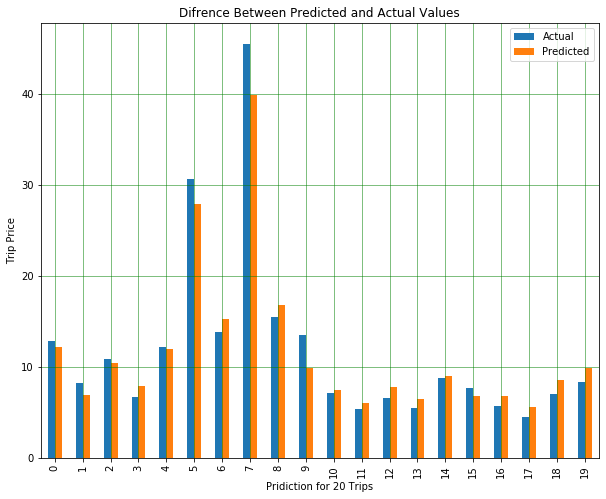

The coeficients of the predictors


,Coefficient,feature
0,dropoff_day,-1.887305e-01
1,dropoff_hour,-3.295561e-02
2,dropoff_minute,1.540272e+00
3,passenger_count,1.879556e+00
4,payment_method_rec_Cash,2.396445e-01
5,payment_method_rec_Credit,6.877758e+00
6,payment_method_rec_No charge,-5.831990e-01
7,pickup_day,6.056456e-02
8,pickup_hour,8.804878e-03
9,pickup_minute,9.040080e-02


In [41]:
def reg_model_evaluation(XX_train, XX_test, y_train, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    X_train,X_test=standard_scaler(XX_train, XX_test)
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    list1=sum(regressor.coef_.tolist(), [])
    list2=sorted(XX_train.columns)
    df = pd.DataFrame(list(zip(list2,list1)), 
               columns =['Coefficient', 'feature']) 

    print("The intercept value: {}".format(regressor.intercept_))
    X_pred = regressor.predict(X_train)
    train_score = r2_score(y_train, X_pred)
    print("RSquared Train set : {}".format(train_score))
    
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)   
    test_score=r2_score(y_test,y_pred)
    print("RSquared Test  set : {}".format(test_score))
    
    actual=y_test[y_test.columns[0]].tolist()
    Predicted=sum(y_pred.tolist(), [])

    df1 = pd.DataFrame({'Actual':actual, 'Predicted': Predicted})
    df2=df1.head(20)

    df2.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title('Difrence Between Predicted and Actual Values')
    plt.xlabel('Pridiction for 20 Trips')
    plt.ylabel('Trip Price')
    plt.show()
    print("The coeficients of the predictors")
    return df
reg_model_evaluation(XX_train, XX_test, y_train, y_test)


<br> 
# <font color='#8000ff'>Feature Selection  </font>

# <font color='#ff0066'>  Filter Method: Secound round </font> 
> ## A) Univariate mse

**The Univariate mean_squared_error** Evaluates the relationship between each features individually with the target. Below I am witring a function to compute the Univariate mse using a decision tree. 
* First, to predict the target, it builds one decision tree per feature.
* Secound, initialise an empty list to store all **mse** of all the features.
* third, loop over all the features and: build a decision tree, fit the features and append thier **mse** to the list.
* Third, it ranks the features according to the machine learning metric ** mse**
* It selects the highest ranked features

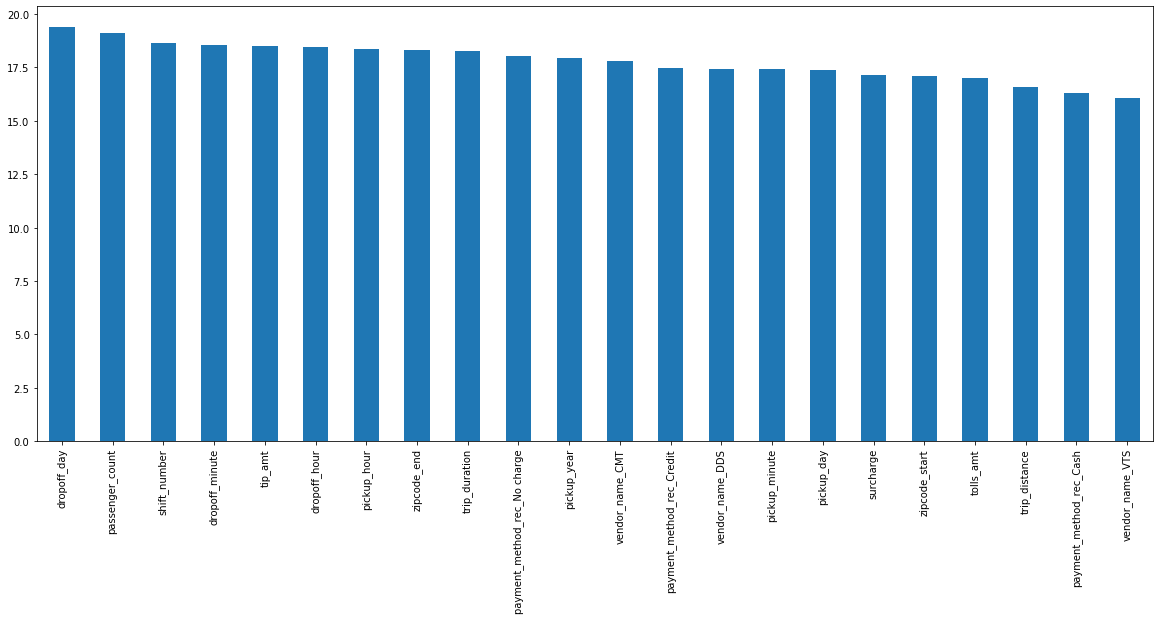

In [42]:
# loop to build a tree, make predictions and get the mse
# for each feature of the train set
def Feat_Selec_Univariate_mse(XX_train, XX_test, y_train, y_test):
    from sklearn.tree import  DecisionTreeRegressor
    from sklearn.metrics import roc_auc_score, mean_squared_error
    mse_values = []
    for feature in XX_train.columns:
        clf = DecisionTreeRegressor()
        clf.fit(XX_train, y_train)
        y_scored = clf.predict(XX_test)
        mse_values.append(mean_squared_error(y_test, y_scored))
    # let's add the variable names and order it for clearer visualisation
    mse_values = pd.Series(mse_values)
    mse_values.index = XX_train.columns
    mse_values.sort_values(ascending=False)
    mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))
Feat_Selec_Univariate_mse(XX_train, XX_test, y_train, y_test)

####  Independently of each other, it looks like all the features in the data have  some sorte of  relationship with the target. 



>##  B) The correlation Method 
Correlation Feature Selection evaluates subsets of features on the basis of the following hypothesis: **"Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other".**
>> ### 1) Viualise the corelations
>>> * call the corelation mattrix **Pearson Coefficient of Correlation**
>>> * Use pandas **heatmap()** funtion to visualize it with seaborn

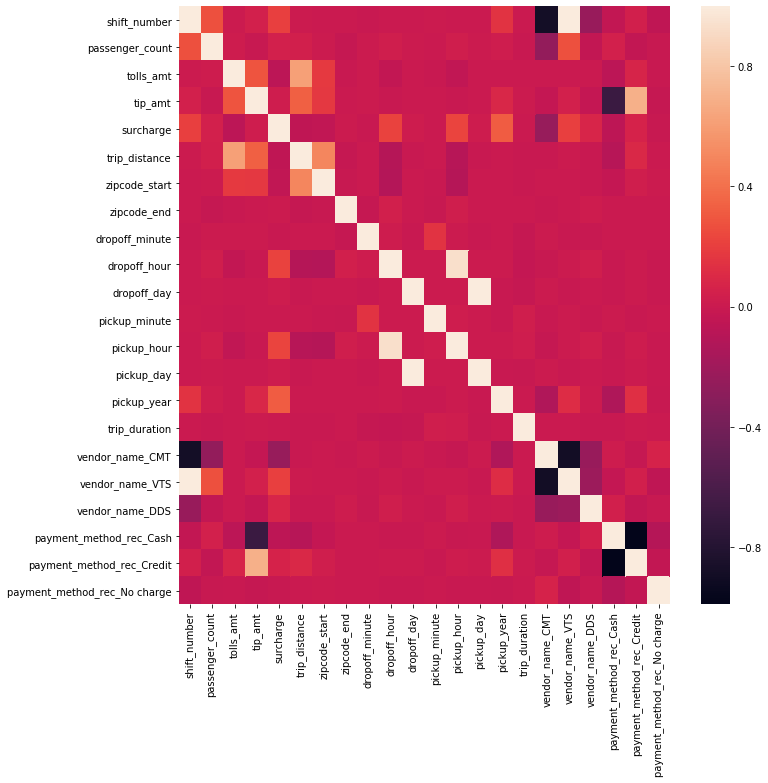

In [43]:
# vizualize the correlation
def corr_vis(df):
    corr_matrix = df.corr()
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(corr_matrix)
corr_vis(XX_train)

>> ### 1) Get the correlated features.
To get the correlated features, I wrote a function that takes 3 arguments: a DataFrame, a threshold and a third argument to choose what method of correlation we are interested in. If we set  **Brute_force=True** the function will return a list of features that are corelated with at least another features. Else If, we want to investigate further the corelated features we set **Brute_force=False** the function will return a DataFrame of all pairs of correlated features.


In [44]:
def correlation(df, threshold,Brute_force=False):
    # Set of all the names of correlated columns
    column1 = []
    column2 = []
    absolu  = []
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
             #evaluate all possilbe pairs of features and 
            # compare the absolute value against the the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # getting the name of column
                col1 = corr_matrix.columns[i] 
                col2 = corr_matrix.columns[j]
                abso = abs(corr_matrix.iloc[i, j])
                absolu.append( abso)
                column1.append(col1)
                column2.append(col2)
                
    if Brute_force is True:
        return list(set(column1))
    else:
        df = pd.DataFrame(list(zip(column1,column2,absolu)), 
               columns =['feature1', 'feature2','correlation']) 
    return df


>> #### 1-a) Brute_force method
I Use the Brute_force method to return just the list of correlated features by calling the correlation function above and  setting **Brute_force = True**. I will set the threshold to 0.8

In [45]:
# returning correlated features in a list
corr_list=correlation(XX_train, 0.8,Brute_force = True)
corr_list

['pickup_day',
 'payment_method_rec_Credit',
 'pickup_hour',
 'vendor_name_VTS',
 'vendor_name_CMT']

>> #### 1-b) a look at correlated features
Before deleting the obove set of features let's take a look at them. In order to do that, we  will the correlation function with it's  defualt setting Brute_force = False.  again, i will set the threshold to 0.8. The function returns a dataframe of the correlated features into columns as well as thier respective corelation number.

In [46]:
# returning correlated features in a dataframe 
corr_df=correlation(XX_train, 0.8)
corr_df

,feature1,feature2,correlation
0,pickup_hour,dropoff_hour,0.937131
1,pickup_day,dropoff_day,0.999521
2,vendor_name_CMT,shift_number,0.886241
3,vendor_name_VTS,shift_number,0.993791
4,vendor_name_VTS,vendor_name_CMT,0.897290
5,payment_method_rec_Credit,payment_method_rec_Cash,0.991275


From the above DataFrame we can see that there some features that are correlated with more than one feature. Therefore depending on how many features we want to end up  with in the DataFrame, we can keep only one feature from each group.

>> #### 1-a)  getting all the correlated groups
Below I write a function that compares each feature with all of the other features it correlated with. This function takes as an argument the resultant DataFrame from the above correlation function and it returns all the groups of all correlated features.



In [47]:
def correlated_groups(df):
    feature1 = []
    groups = []
    for feature in df.feature1.unique():
        if feature not in feature1:
            # find all features correlated to a single feature
            correlated_block = df[df.feature1 == feature]
            feature1 = feature1 + list(correlated_block.feature2.unique()) + [feature]
            # append the block of features to the list
            groups.append(correlated_block)   
    print('Found {} correlated groups'.format(len(groups)))
    print('out of {} total features'.format(XX_train.shape[1]))          
    return groups


In [48]:
# Here i call the correlated_groups and pass it the corelation dataframe
# lets vizualize one group
groups=correlated_groups(corr_df)

groups[3]

Found 5 correlated groups
out of 22 total features


,feature1,feature2,correlation
3,vendor_name_VTS,shift_number,0.993791
4,vendor_name_VTS,vendor_name_CMT,0.897290


>> ### 2) Witch features to keep and with one to delete.
>> #### 2-a) Kepp features with less missing data
one way to decide for example, is to keep the features with less missing data. I don’t have any missing data , as we took care of it already, I am writing this function for future use.
 The function takes


In [49]:
def less_missing_data(groups, df):
    feat_keep=set()
    feat_total=[]
    for group in groups:
        feature1=list(group.feature2.unique()) # get the features in the secound column of the group
        feature2=list(group.feature1.unique()) #get the features in the first column of the group
        features=feature1+feature2 # join the features and make a list
        feat_total.append(features) 
    i=1
    feature_keep=set()
    for row in feat_total:
        print("*************************group",[i]," feature nulls****************************")
        print('{:30.20}'.format("The feature "), '{:32.20}'.format("# of nulls"),'{:4.30}'.format(" % of nulls"))
        print('-----------------------------------------------------------------------------')
        
        null=[]
        for elem in row:       
            num_null=df[elem].isnull().sum()
            per=num_null*100/len(df)
            if null == []:
                null.append(num_null)
                feature_keep.add(elem)            
            elif null != []:
                if num_null>null[0]:
                    feature_keep.add(elem)
                else:
                    pass    
            print('{:33.20}'.format(elem),'{:33.20}'.format(str(num_null)), '{:4.6}'.format(str(per)),'{:4.6}'.format('%')) 
        print('')
        i=i+1
    feat_total=sum(feat_total,[])  
    list_drop=[feat for feat in feat_total if feat not in feature_keep]
    
    print('-----------------------------------------------------------------------------')
    print("***************************List of features to keep *************************")
    print('-----------------------------------------------------------------------------')
    print("")
    print(list(feature_keep))
    print("")
    print('-----------------------------------------------------------------------------')
    print("***************************List of features drop ****************************")
    print('-----------------------------------------------------------------------------')
    return list(set(list_drop))


The above function takes a data frame and the groups of correlated features of that data frame. 
* It first prints all the features per group, their relative numbers, and percentages of missing data. 
* Second, it evaluates all features in each group and saves the feature with the smallest number of missing data.
* Third, it prints a list of all features that have less missing data, one from each group
* Finally, it returns a list of features that we should delete; these features have the largest percentages of each group
**note**, if features have the same number of missing data it will return the the first in each group.


In [50]:
# her i call the less missing data function 
# it should return the same as above given the order of the features
less_missing_data(groups, XX_train)

*************************group [1]  feature nulls****************************
The feature                    # of nulls                        % of nulls
-----------------------------------------------------------------------------
dropoff_hour                      0                                 0.0  %   
pickup_hour                       0                                 0.0  %   

*************************group [2]  feature nulls****************************
The feature                    # of nulls                        % of nulls
-----------------------------------------------------------------------------
dropoff_day                       0                                 0.0  %   
pickup_day                        0                                 0.0  %   

*************************group [3]  feature nulls****************************
The feature                    # of nulls                        % of nulls
--------------------------------------------------------------------

['pickup_day',
 'payment_method_rec_Credit',
 'pickup_hour',
 'vendor_name_VTS',
 'vendor_name_CMT']

>> #### 2-a) keep the features with the most predictive power
Alternatively, we could build a machine learning algorithm using all the features from the above groups, and select the the features that have the most predictive. To do this, i wrote the function below. The funstion takes the train and test set and the groups of correlated features from above. To detemine which feature have the most predictive power, i train a random forest model and i use it's **importances_ parameter** to determine the feature with the most predivtive power from each group.

In [51]:
def rf_feat_importance_(XX_train,y_train,groups):

    from sklearn.ensemble import RandomForestRegressor
    
    feat_keep=set()# initialize a list of features to keep
    feat_total=[]# initialize a list of of all corelated features 
    i=1
    # looping over all the groups
    for group in groups:
        feature1=list(group.feature2.unique()) # get the features in the secound column of the group
        feature2=list(group.feature1.unique()) #get the features in the first column of the group
        features=feature1+feature2 # join the features and make a list
        feat_total.append(features) # append the features to the total list
        rf = RandomForestRegressor(n_estimators=200, max_depth=4)# make instance of random forest regressor
        rf.fit(XX_train[features], y_train.values.ravel())# train the model
        print("")
        print("********group",[i],"features importance*******")
        print("----------------------------------------------")
        #*********using rf.feature_importances_ parameter of the ramdom forest
        # get the importance of the features and save it into a series
        importance = pd.concat(# make a serries to capture each feature and its importance
        [pd.Series(features),
         pd.Series(rf.feature_importances_)], axis=1)
        importance.columns = ['feature', 'importance']
        series=importance.sort_values(by='importance',ascending=False)
        feat_keep.add(series['feature'][0])
        print(series)
        i=i+1

    feat_total=sum(feat_total,[]) 
    list_drop=[feat for feat in feat_total if feat not in feat_keep]
    print("")
    print("----------------------------------------------")
    print("----------------------------------------------")
    print("********List of features to keep *************")
    print("----------------------------------------------") 
    print("")
    print(feat_keep)
    print("")
    print("----------------------------------------------")
    print("********List of features drop ****************")
    print("----------------------------------------------") 

    return list(set(list_drop))


In [52]:
# here i call the function and acess each feature importance with  random forest **importance_ parameter  
rf_feat_importance_(XX_train,y_train,groups )


********group [1] features importance*******
----------------------------------------------
        feature  importance
0  dropoff_hour     0.61803
1   pickup_hour     0.38197

********group [2] features importance*******
----------------------------------------------
       feature  importance
0  dropoff_day     0.59205
1   pickup_day     0.40795

********group [3] features importance*******
----------------------------------------------
           feature  importance
0     shift_number    0.998719
1  vendor_name_CMT    0.001281

********group [4] features importance*******
----------------------------------------------
           feature  importance
0     shift_number    0.998572
1  vendor_name_CMT    0.001191
2  vendor_name_VTS    0.000237

********group [5] features importance*******
----------------------------------------------
                     feature  importance
1  payment_method_rec_Credit    0.924179
0    payment_method_rec_Cash    0.075821

-----------------------------

['pickup_day',
 'payment_method_rec_Credit',
 'pickup_hour',
 'vendor_name_VTS',
 'vendor_name_CMT']

In [53]:
XX_train.head(2)

,shift_number,passenger_count,tolls_amt,tip_amt,surcharge,trip_distance,zipcode_start,zipcode_end,dropoff_minute,dropoff_hour,...,pickup_hour,pickup_day,pickup_year,trip_duration,vendor_name_CMT,vendor_name_VTS,vendor_name_DDS,payment_method_rec_Cash,payment_method_rec_Credit,payment_method_rec_No charge
7356,1287916,1,0.0,0.0,0.0,2.2,10003,10018,54,14,...,14,22,2008,12,1,0,0,1,0,0
17152,4846778,3,0.0,0.0,0.0,3.8,10115,10110,33,0,...,0,23,2009,12,1,0,0,1,0,0


In [54]:
# interstingly all of the functions returned the same list of features
# i am going to delete thse features
XX_train.drop(['vendor_name_CMT','vendor_name_VTS','pickup_day','payment_method_rec_Credit',
               'pickup_hour'] ,inplace=True, axis=1)
XX_test.drop(['vendor_name_CMT','vendor_name_VTS','pickup_day','payment_method_rec_Credit',
               'pickup_hour'] ,inplace=True, axis=1)

In [55]:
XX_train.head(2)

,shift_number,passenger_count,tolls_amt,tip_amt,surcharge,trip_distance,zipcode_start,zipcode_end,dropoff_minute,dropoff_hour,dropoff_day,pickup_minute,pickup_year,trip_duration,vendor_name_DDS,payment_method_rec_Cash,payment_method_rec_No charge
7356,1287916,1,0.0,0.0,0.0,2.2,10003,10018,54,14,22,42,2008,12,0,1,0
17152,4846778,3,0.0,0.0,0.0,3.8,10115,10110,33,0,23,21,2009,12,0,1,0


## vizualize the correlation after deleting the correlated features 

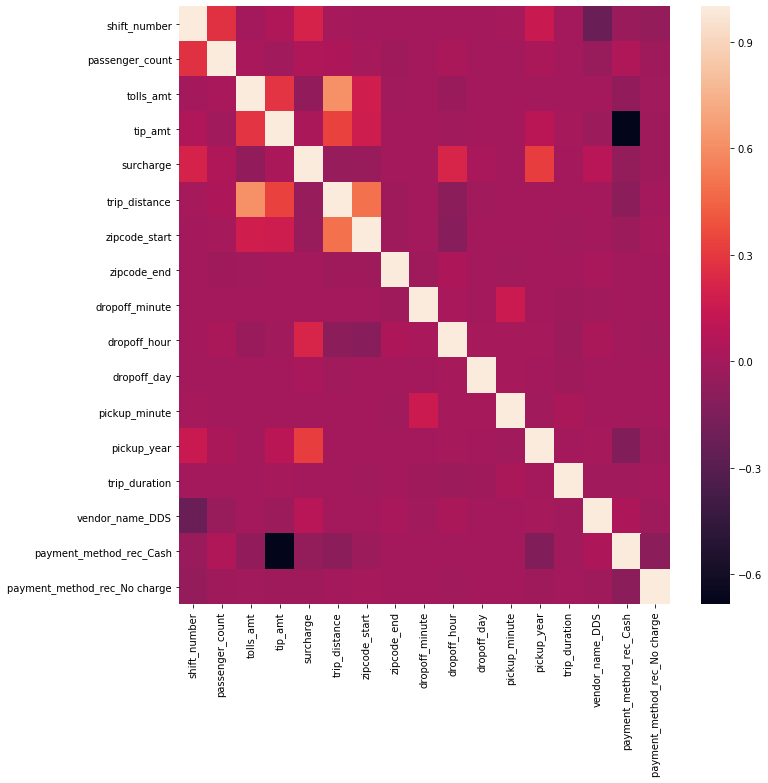

In [56]:
# vizualize the correlation
def corr_vis(df):
    corr_matrix = df.corr()
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(corr_matrix)
corr_vis(XX_train)

## Here i call the model **reg_model_evaluation** Function to make an new prediction on the filtered XX_train data

The intercept value: [11.05293815]
RSquared Train set : 0.8641528007042238
RSquared Test  set : 0.8842106081604424


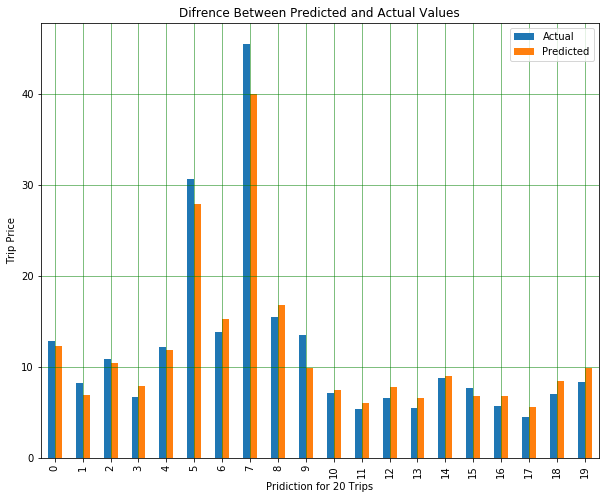

The coeficients of the predictors


,Coefficient,feature
0,dropoff_day,0.035637
1,dropoff_hour,-0.030595
2,dropoff_minute,1.533538
3,passenger_count,1.879927
4,payment_method_rec_Cash,0.240871
5,payment_method_rec_No charge,6.882039
6,pickup_minute,-0.584612
7,pickup_year,0.060531
8,shift_number,0.007737
9,surcharge,0.168151


In [57]:
reg_model_evaluation(XX_train, XX_test, y_train, y_test)
# this is RSquared Train set : 0.8641662398048329 for the above prediction
#RSquared Test  set : 0.8841838902097943


after performing the above  **filter methods** technics for feature selection we got a very small performance improvement on the train set and the model proformed a little worst in the trian set . 

<br> 
# <font color='#8000ff'>Feature Selection  </font>

# <font color='#ff0066'> 2) Embeded Methods: </font> 
> ## A) Regression Coefficients 
 
Here I am going to use the regression coefficient method  to figure out the list of features whose coefficient are above the mean. 

In [58]:
def regression_coef(XX_train,XX_test,y_train):
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import SelectFromModel
    X_train,X_test=standard_scaler(XX_train, XX_test)
    sel_ = SelectFromModel(LinearRegression())
    sel_.fit_transform(X_train, y_train)
    mst_pre_feat = XX_train.columns[(sel_.get_support())]
    return list(mst_pre_feat)
regression_coef(XX_train,XX_test,y_train)

['tolls_amt', 'tip_amt', 'trip_distance']

### I am going to train my model with only these tree features and see what happens

In [59]:
XX_train=XX_train[['tolls_amt', 'tip_amt', 'trip_distance']]

In [60]:
XX_test=XX_test[['tolls_amt', 'tip_amt', 'trip_distance']]

The intercept value: [11.05293815]
RSquared Train set : 0.8592375281113369
RSquared Test  set : 0.8782082312002772


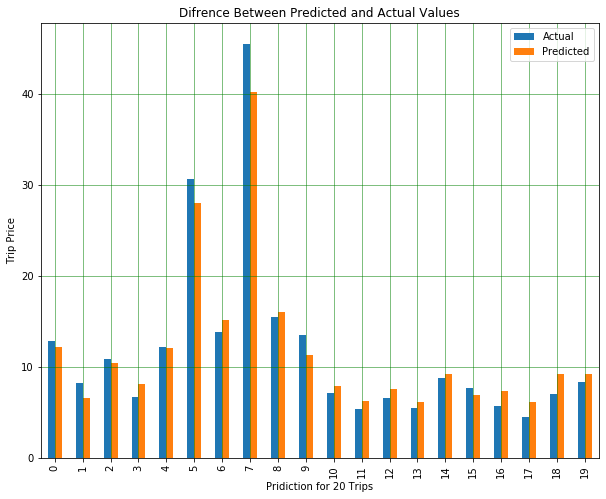

The coeficients of the predictors


,Coefficient,feature
0,tip_amt,1.655765
1,tolls_amt,1.780206
2,trip_distance,6.503568


In [61]:
#call the function reg_model_evaluation to visualise the models performance
reg_model_evaluation(XX_train, XX_test, y_train, y_test)